In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
# Generamos datos simulados sin ruido (y = 2x + 5)
X = np.linspace(0, 10, 100)  # Característica: valores de 0 a 10
y = 2 * X + 5  # Etiqueta sin ruido

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Generamos datos simulados sin ruido (y = 2x + 5)
X = np.linspace(0, 10, 100)  # Característica: valores de 0 a 10
y = 2 * X + 5  # Etiqueta sin ruido

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Redimensionamos X para que tenga la forma adecuada para la red neuronal
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [5]:
# Creamos un modelo secuencial con Keras (una red neuronal con 1 sola neurona)
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))  # Solo 1 neurona
])

# Compilamos el modelo (usamos el optimizador 'adam' y la pérdida 'mse' para regresión)
modelo.compile(optimizer='adam', loss='mse')

# Entrenamos el modelo
historial = modelo.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Realizamos predicciones
y_pred = modelo.predict(X_test)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 458.5789 - val_loss: 382.6394
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 449.0521 - val_loss: 381.9156
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 432.9854 - val_loss: 381.1948
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 449.1878 - val_loss: 380.4735
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 450.4768 - val_loss: 379.7581
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 447.4390 - val_loss: 379.0433
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 465.8989 - val_loss: 378.3287
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 462.1881 - val_loss: 377.6145
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 468.1820 - val_loss: 376.9008
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 450.2445 - val_loss: 376.1900
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 460.7277 - val_loss: 375.4777
Epoch 12/100
3/3 ━━━━━━━━━━━━━

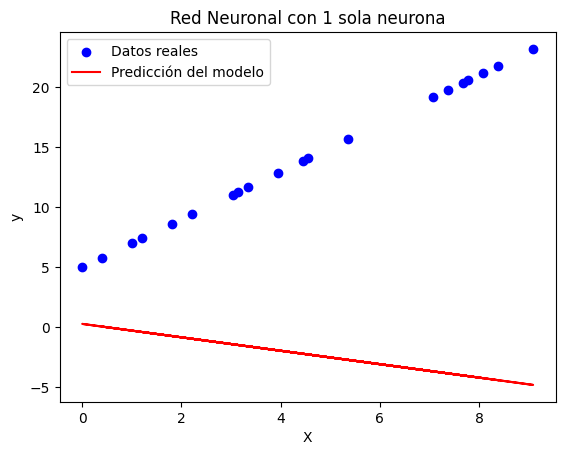

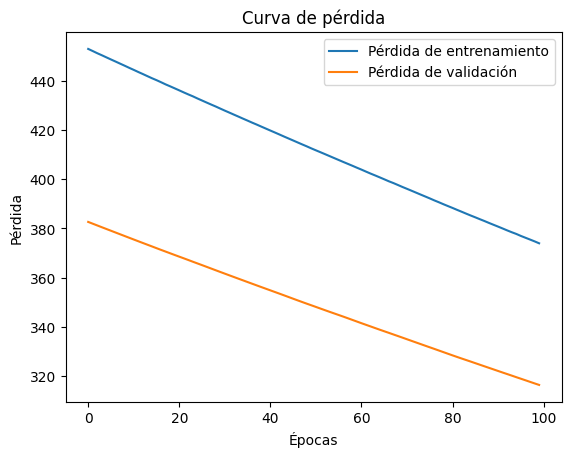

Pendiente (peso): [-0.5588802]
Intersección (ordenada al origen): 0.2927224040031433


In [7]:
# Visualizamos los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicción del modelo')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Red Neuronal con 1 sola neurona')
plt.legend()
plt.show()

# Visualizamos la curva de pérdida durante el entrenamiento
plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de pérdida')
plt.legend()
plt.show()

# Imprimimos los pesos (pendiente) y la intersección (ordenada al origen)
pesos = modelo.layers[0].get_weights()
print(f"Pendiente (peso): {pesos[0][0]}")
print(f"Intersección (ordenada al origen): {pesos[1][0]}")